In [1]:
from random import randint
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import io
import requests
from time import sleep, time


merge_result_stocks=pd.DataFrame()


confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

read_confirmed_Cases = pd.read_csv(confirmed_cases_url)
df = pd.DataFrame(read_confirmed_Cases)


read_dead_Cases = pd.read_csv(deaths_url)
df1 = pd.DataFrame(read_dead_Cases)



confirmed_cases_melt = pd.melt(
    df, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
confirmed_cases_melt['variable'] = pd.to_datetime(
    confirmed_cases_melt['variable'], format='%m/%d/%y')
confirmed_cases_melt['variable'] = confirmed_cases_melt['variable'].astype(
    'datetime64[ns]')
confirmed_cases_melt = confirmed_cases_melt.rename(
    columns={'variable': 'date', 'value': 'confirmedCases'})

confirmed_cases_melt = confirmed_cases_melt.groupby('date', as_index=False)[
                                                     'confirmedCases'].sum()


dead_case_melt = pd.melt(
    df1, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
dead_case_melt['variable'] = pd.to_datetime(
    dead_case_melt['variable'], format='%m/%d/%y')
dead_case_melt['variable'] = dead_case_melt['variable'].astype(
    'datetime64[ns]')
dead_case_melt = dead_case_melt.rename(
    columns={'variable': 'date', 'value': 'DeathCases'})

dead_case_melt = dead_case_melt.groupby('date', as_index=False)[
                                         'DeathCases'].sum()


merge_data_sources = pd.merge(confirmed_cases_melt, dead_case_melt, on=['date'])
print(merge_data_sources)

f = open('creds.json')

data = json.load(f)

apiKey = data['apiKey']
travelStock = data['travelStock']
realEstateStock = data['realEstateStock']
metalStock = data['metalStock']
americanStock = data['americanStock']
canadaStock = data['canadaStock']


stocklists = []

stocklists.append(americanStock)
stocklists.append(canadaStock)
stocklists.append(travelStock)
stocklists.append(realEstateStock)
stocklists.append(metalStock)

URL = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&apikey="+apiKey+"&datatype=csv"

def API(URL,stock):
    api = URL+"&symbol="+stock
    urldata = requests.get(api).content
    stock_df = pd.DataFrame(pd.read_csv(io.StringIO(urldata.decode('utf-8'))))
    if('timestamp' in stock_df):          
          stock_df = stock_df.drop(columns=['open', 'volume'])
          stock_df = stock_df.rename(columns={'timestamp': 'date'})
          stock_df = stock_df.rename(columns={'high': stock+'_high'})
          stock_df = stock_df.rename(columns={'low': stock+'_low'})
          stock_df = stock_df.rename(columns={'close': stock+'_close'})
          stock_df['date'] = stock_df['date'].astype('datetime64')
          stock_df[stock] = stock
          return stock_df     


df1 = pd.concat([API(URL,x) for x in stocklists],sort=True).sort_index()
merge_result_StockData = pd.merge(merge_data_sources, df1, on=['date'])
stockdata_df=merge_result_StockData.fillna("N/A")
print(stockdata_df)


       
      

          date  confirmedCases  DeathCases
0   2020-01-22             557          17
1   2020-01-23             657          18
2   2020-01-24             944          26
3   2020-01-25            1437          42
4   2020-01-26            2120          56
..         ...             ...         ...
819 2022-04-20       507058240     6207938
820 2022-04-21       507968906     6212010
821 2022-04-22       508767898     6215898
822 2022-04-23       509284898     6217334
823 2022-04-24       509663840     6218306

[824 rows x 3 columns]
           date  confirmedCases  DeathCases  AAPL AAPL_close AAPL_high  \
0    2020-01-22             557          17   N/A        N/A       N/A   
1    2020-01-22             557          17  AAPL      317.7    319.99   
2    2020-01-22             557          17   N/A        N/A       N/A   
3    2020-01-22             557          17   N/A        N/A       N/A   
4    2020-01-22             557          17   N/A        N/A       N/A   
...         ... 

In [4]:
stockdata_df.to_csv('StockData.csv',index=True)

TypeError: show() takes from 0 to 2 positional arguments but 22 were given

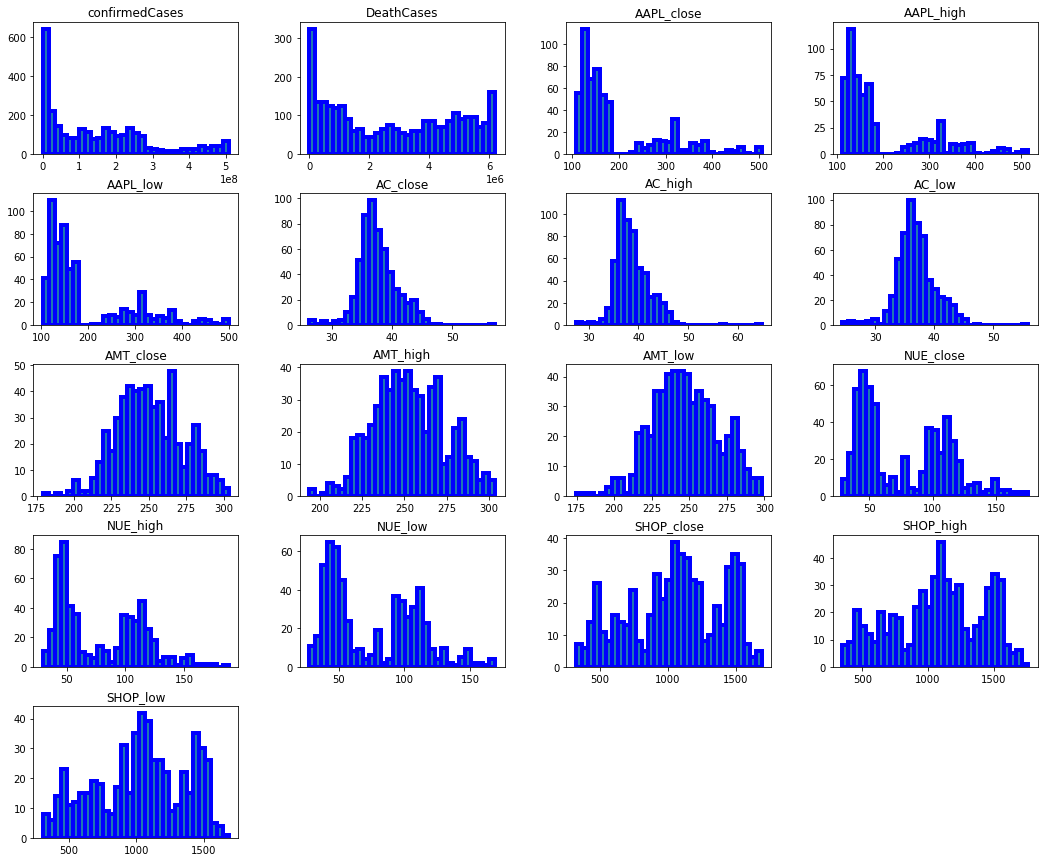

In [27]:
df = pd.read_csv('StockData.csv')
df = df[['confirmedCases','DeathCases','AAPL','AAPL_close','AAPL_high','AAPL_low','AC','AC_close','AC_high', 'AC_low','AMT','AMT_close','AMT_high','AMT_low','NUE','NUE_close','NUE_high','NUE_low','SHOP','SHOP_close','SHOP_high','SHOP_low']]
df.hist(figsize=(18,15),bins=31, linewidth='4',edgecolor='blue',grid=False)
plt.show('confirmedCases','DeathCases','AAPL','AAPL_close','AAPL_high','AAPL_low','AC','AC_close','AC_high', 'AC_low','AMT','AMT_close','AMT_high','AMT_low','NUE','NUE_close','NUE_high','NUE_low','SHOP','SHOP_close','SHOP_high','SHOP_low')

TypeError: show() takes from 0 to 2 positional arguments but 3 were given

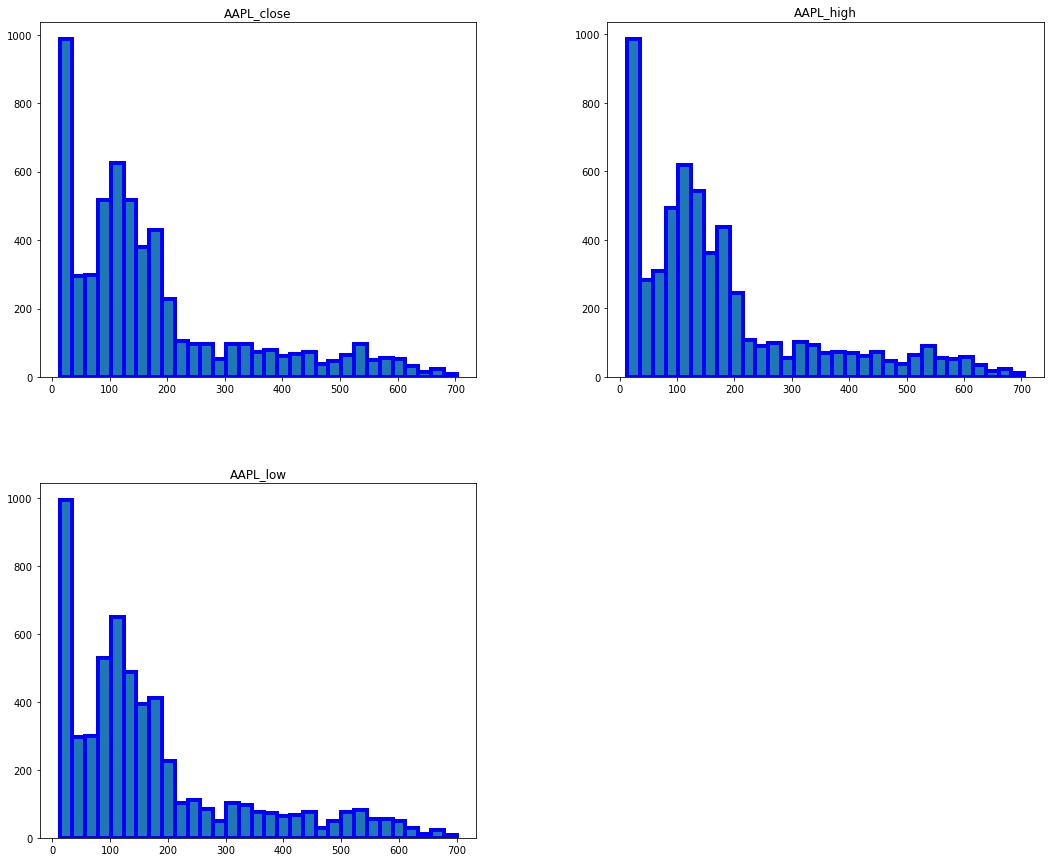

In [32]:
df1 = df1[['AAPL_close','AAPL_high','AAPL_low']]
df1.hist(figsize=(18,15),bins=31, linewidth='4',edgecolor='blue',grid=False)
plt.show('AAPL_close','AAPL_high','AAPL_low')

TypeError: show() takes from 0 to 2 positional arguments but 3 were given

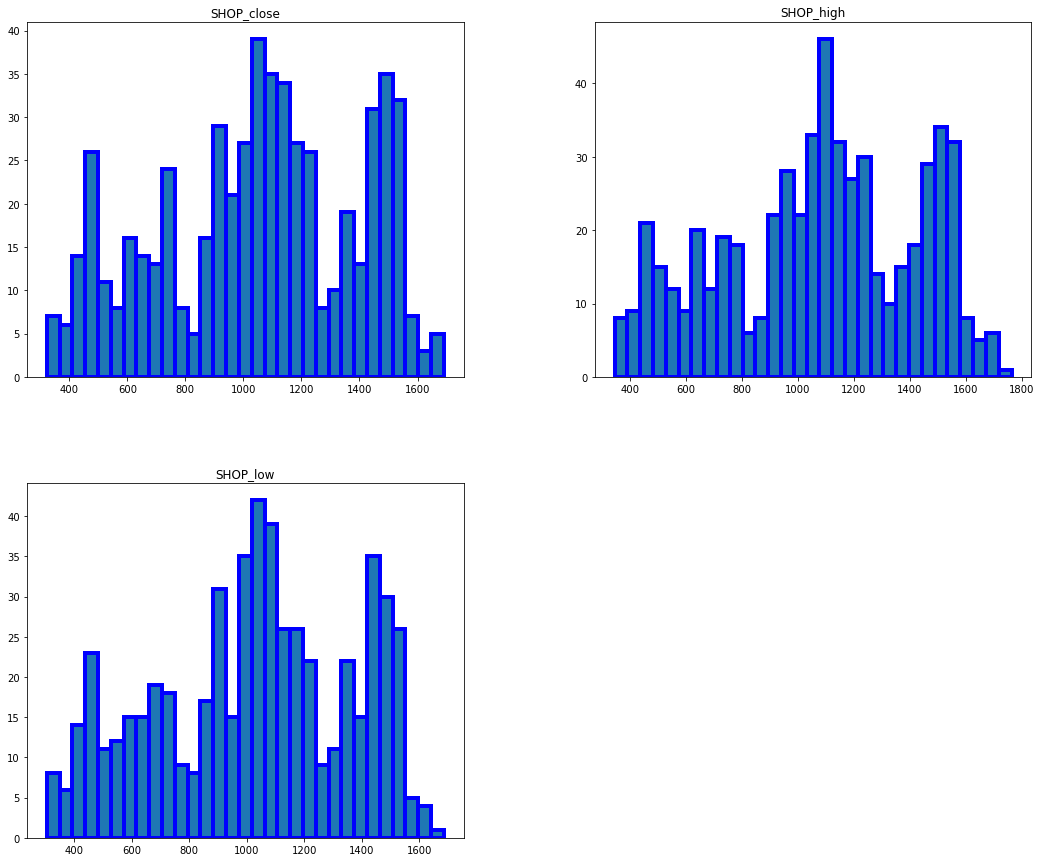

In [44]:
df2 = df[['SHOP_close','SHOP_high','SHOP_low']]
df2.hist(figsize=(18,15),bins=31, linewidth='4',edgecolor='blue',grid=False)
plt.show('SHOP_close','SHOP_high','SHOP_low')

TypeError: show() takes from 0 to 2 positional arguments but 3 were given

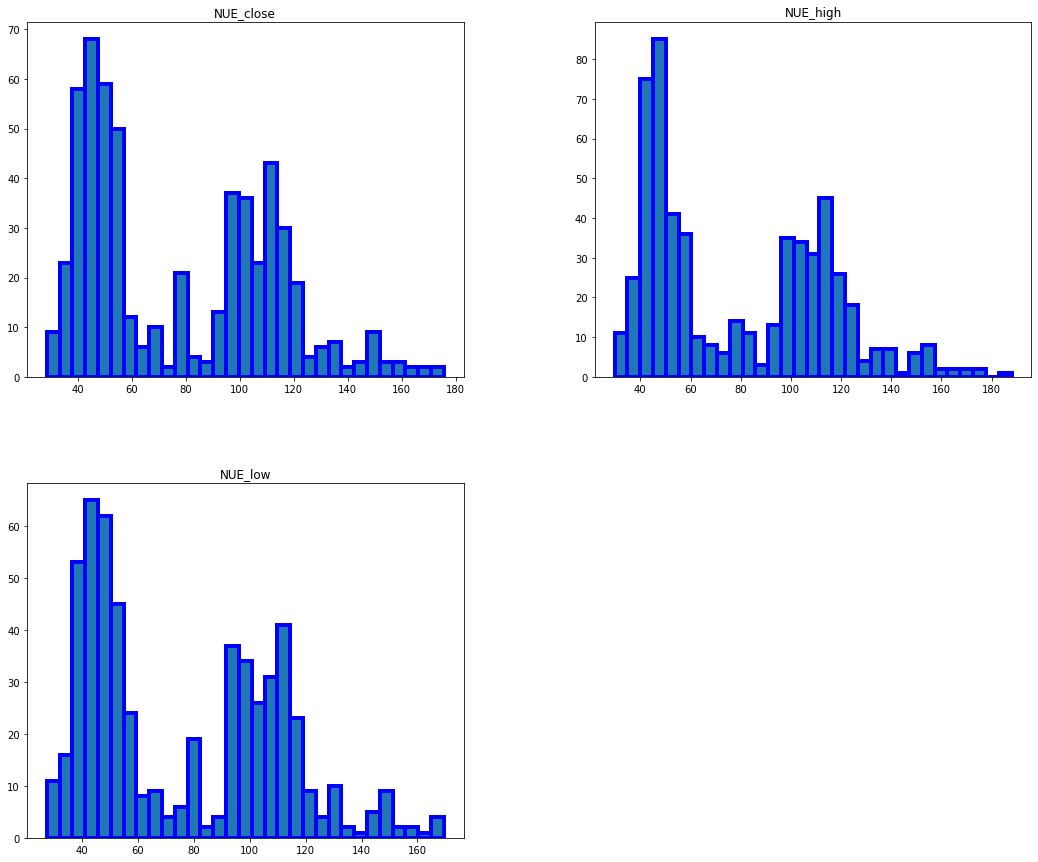

In [45]:
df3 = df[['NUE_close','NUE_high','NUE_low']]
df3.hist(figsize=(18,15),bins=31, linewidth='4',edgecolor='blue',grid=False)
plt.show('NUE_close','NUE_high','NUE_low')

TypeError: show() takes from 0 to 2 positional arguments but 3 were given

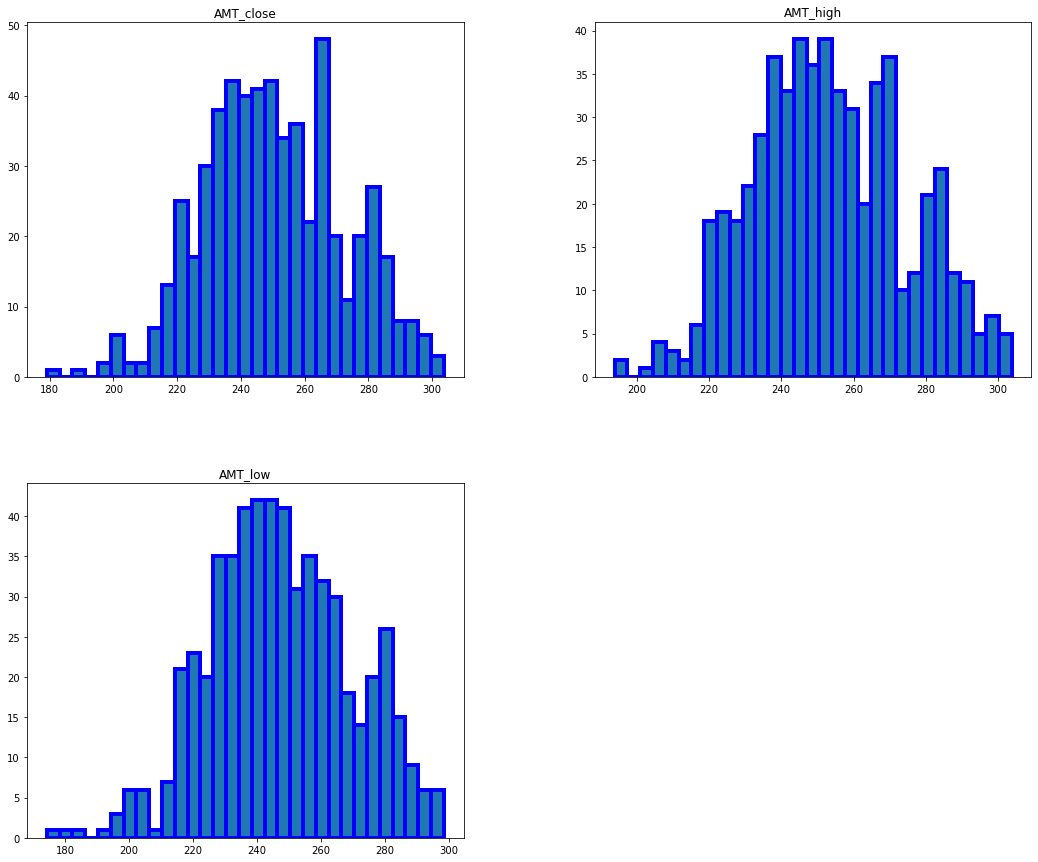

In [46]:
df4 = df[['AMT_close','AMT_high','AMT_low']]
df4.hist(figsize=(18,15),bins=31, linewidth='4',edgecolor='blue',grid=False)
plt.show('AMT_close','AMT_high','AMT_low')

TypeError: show() takes from 0 to 2 positional arguments but 3 were given

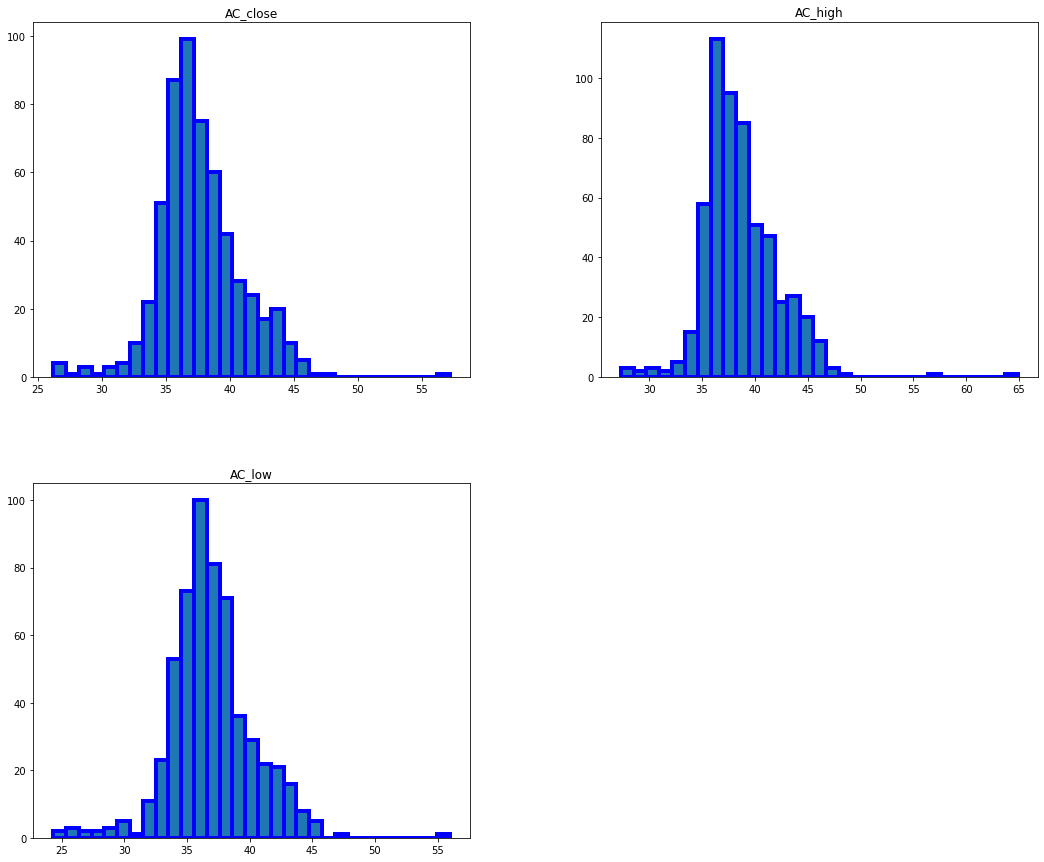

In [47]:
df5 = df[['AC_close','AC_high','AC_low']]
df5.hist(figsize=(18,15),bins=31, linewidth='4',edgecolor='blue',grid=False)
plt.show('AC_close','AC_high','AC_low')

KeyError: 'date'